<a href="https://colab.research.google.com/github/mahmud-nobe/CS110_pcw/blob/master/CS110_Pre_Class_Work_14_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [0]:
NAME = "Md Mahmudunnobe"
COLLABORATORS = ""

---

# CS110 Pre-class Work 13.2

## Question 1.

The Python class `Activity` is defined below. Each activity is characterized by its name, its start time and its finish time. Your task is to complete the `greedy_activity_selector` function, which takes a list of activities sorted by their finish times as an argument.

In [0]:

class Activity:
    def __init__(self, name, start, finish):
        self.name = name
        self.start = start
        self.finish = finish
    
def greedy_activity_selector(A):
    """
    Implements an iterative greedy algorithm to solve the activity-selection 
    problem (making use of NO recursive calls). See GREEDY-ACTIVITY-SELECTOR 
    in Cormen et al., p.421
    
    Inputs:
    - A: list of activities, instances of Activity, already sorted by finish 
    times
    
    Outputs:
    - out_list: the longest list possible of mutually compatible activities.
    """
    
    n = len(A) # number of activities

    out_list = [A[0]]

    k = 0

    for i in range(1, n):
        if(A[i].start >= A[k].finish):
            out_list = out_list + [A[i]]
            k = i
    
    return out_list

    raise NotImplementedError()



## Question 2. 
Complete the function below.

In [0]:
def recursive_activity_selector(A, k, n):
    """
    Implements a recursive greedy algorithm to solve the activity-selection 
    problem. See RECURSIVE-ACTIVITY-SELECTOR in Cormen et al., p.419. Note 
    that in Cormen et al., the call that solves the entire problem is the call
    with k=0. Because of the 0-indexing scheme in Python, the call that solves 
    the entire problem is with k=-1 (i.e., recursive_activity_selector(A, -1, len(A)))
    
    Inputs:
    - A: list of activities, instances of Activity, already sorted by finish 
    times
    - k: int, defines the subproblem S_k it is to solve (see Cormen et al.) for 
    the definition of the subproblem S_k
    - n: int, the size n of the original problem
    
    Outputs:
    - out_list: the longest list possible of mutually compatible activities. 
    """
    
    m = k + 1

    out_list = []

    while(m < n and A[m].start < A[k].finish):
        m += 1
    
    if (m < n):
        return [A[m]] + recursive_activity_selector(A, m, n)
    else:
        return []

    #raise NotImplementedError()



In [40]:
A = activity_list_gen(10)
for i in range(len(A)):
    print(A[i].name, A[i].start, A[i].finish)

0 0 2
1 3 4
2 3 7
3 5 8
4 10 15
5 16 18
6 18 19
7 17 21
8 17 22
9 22 26


In [41]:
out_list = recursive_activity_selector(A, -1, len(A))
for i in range(len(out_list)):
    print(out_list[i].name, out_list[i].start, out_list[i].finish)
out_list

[]

## Question 3. 
Compare the running time of `greedy_activity_selector` and `recursive_activity_selector` on different lengths of a random activity list. Do this by producing a plot, where the x axis is the length of the activity list (`list(range(1,1000,10))`) and the y axis is the running time. Note that:
1. Don't forget to average your results over 100 iterations for each length of the activity list.
2. The two lines for `greedy_activity_selector` and `recursive_activity_selector` should be present in the same plot (with different colors), not two separate plots, for easy comparison. 
3. To generate an random activity list of a certain length, use the function `activity_list_gen` below. 

In [0]:
import random
def activity_list_gen(n):
    finish_times = random.sample(range(n*3), n)
    finish_times.sort()
    
    start_times = []
    for ftime in finish_times:
        offset = random.randint(1,5)
        start_times.append(max(ftime-offset, 0))
    
    out_list = []
    for i in range(n):
        out_list.append(Activity(str(i), start_times[i], finish_times[i]))
    
    return out_list

In [11]:
A = activity_list_gen(10)
for i in range(len(A)):
    print(A[i].name, A[i].start, A[i].finish)

0 0 2
1 0 5
2 3 7
3 4 8
4 7 9
5 9 14
6 15 16
7 15 18
8 18 20
9 23 28


In [13]:
out_list = greedy_activity_selector(A)
for i in range(len(out_list)):
    print(out_list[i].name, out_list[i].start, out_list[i].finish)

0 0 2
2 3 7
4 7 9
5 9 14
6 15 16
8 18 20
9 23 28


In [0]:
out_list = recursive_activity_selector(A, -1, len(A))
for i in range(len(out_list)):
    print(out_list[i].name, out_list[i].start, out_list[i].finish)
# out_list

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import time

recursive_time = []
iterative_time = []

for n in range(1,1000,10):
    iterative = 0
    recursive = 0

    for _ in range(100):
        print(n)
        A = activity_list_gen(n)

        start = time.time()
        out_list = recursive_activity_selector(A, -1, len(A))
        end = time.time()
        recursive += end - start

        start = time.time()
        out_list = greedy_activity_selector(A)
        end = time.time()
        iterative += end - start

    recursive_time.append(recursive/100)
    iterative_time.append(iterative/100)




        

# raise NotImplementedError()

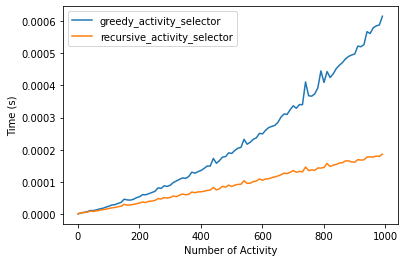

In [44]:
sns.lineplot(range(1,1000,10), iterative_time, label = 'greedy_activity_selector')
sns.lineplot(range(1,1000,10), recursive_time, label = 'recursive_activity_selector')
plt.xlabel('Number of Activity')
plt.ylabel('Time (s)')
plt.show()

## Question 4. 
Explain the results in question 3.





The iterative activity selector has a complexity of polynomial (n^2), while the recursive ones shows almost linear complexity.

## [Optional] Question 5. 
Overload the operator "<" for a comparison between two instances of the class Activity so that A.sort() will sort A, a list of activities, by their finish times.

**This might be very helpful for your final project, so please try this exercise and reach out to the TAs if you'd like to further discuss Overloading in Python**

In [0]:
import copy
class Activity:
    def __init__(self, name, start, finish):
        self.name = name
        self.start = start
        self.finish = finish
    
    def __lt__(self, other):
        # YOUR CODE HERE
        raise NotImplementedError()

# Testing code

A = [Activity('1', 0, 2),
     Activity('2', 1, 5),
     Activity('3', 0, 1),
     Activity('4', 5, 6)]

A.sort()

finish_time_list = []

for act in A:
    finish_time_list.append(act.finish)

B = copy.deepcopy(finish_time_list)
B.sort()
B == finish_time_list